<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etivity4: Comparison of Binary Classifiers

## Synopsis
This notebook builds on the Lab example for etivity4 and adds two new classifications models for comparision along with SVM and Random Forest.  These are the Gaussian Naive Bayes and K Nearest Neighbour models.   The data set is that of classification of seeds.

## Basic concepts of classification algorithms
The key idea here is to predict (**classify**) what class an unknown piece of data (**sample**) belongs to, based on a known (**training**) dataset containing all the classes.

An example would be a dataset of days when Jim goes fishing.  Each day he goes fishing, the day of the week, the weather, the wind, the air temperature and the month are recorded.   Historical data (a training set) is built up recording if Jim did or did not go fishing on a particular day.  This training set helps to determine the boundary conditions on which Jim has a high probability of going fishing.

This training set is presented to a classification algorithm and it will use to the training data to determine if Jim will go fishing today (the target class).

Deciding if an email is junk or not or if a returing book customer is likely to buy a recommended book are further examples.

## Types of classification algorithms/models
Firstly, there are **binary** classification algorithms which only decide one of two possible outcomes.  **Multi-class** classification models can decide what class (from a set of classes) that the data could belong to.   There is also a third set of algorithms which are called **multi-variable**, where a data sample is mapped to a set of target labels (two or more classes).

## Well-known models
There are a number of models to consider, based on the underlying calculation method chosen.  Here, we pick four popular types of classification algorithm:

1.   Support Vector machines (SVM).  This is based on the distances from a medium line (as shown in class)
2.   Random forest.  This is a decision tree algorithm which attempts to create a list of pure subsets to create a binary decision tree.  We also implemeneted this in class.
3.   Naive Bayes method.  This is a linear type of model which assumes that each feature is independent of each other.  It is relatively simple but can be very efficient, hence the reason for studying it.
4.   K Nearest Neighbour method.  In preliminary tests on the dataset earlier in the week, this method kept returning the best score for the prediction test.  The algorithm requires no parameters and is referred to a lazy algorithm (rather than an eager one).  It can be computationally expensive though, as with a large amount of data points, there are a lot of distances between points to be determined.  There are multiple ways to calculate distance, but euclidean is used here.


### Other classifactions
There are other algorithms also, based on Neural Networks and Quadratic classifiers (Upasana, 2019).  However, these are outside the scope of this etivity.

### Reference
Upasana, 2019. Classification Algorithms | Types Of Classification Algorithms | Edureka [WWW Document]. Edureka. URL https://www.edureka.co/blog/classification-algorithms/ (accessed 4.15.20).















## Task 2. Implementation of SVM and Random Forest classification models for seeds

In this database, the 'type' feature determines the type of seed.  As these algorithms require the type to be binary (0 or 1) rather than 1,2 and 3 (which is the range of values in the dataset).  We set one type (type = 1) to 1 and then set the remainder of the type values to 0.   This sets up the training dataset.

Outliers are checked for using a set of boxplots and any features with outliers are subjected to a RobustScaler() process, the remaining features are run through the StandardScalar() process.

The 'type' feature is seperated from the other features (called predictors) and the training inputs are established like the Lab Etivity4 example.

Prediction accuracy values of each model are calculated and comparison of the two methods are plotted.

## Initial results
It was found for 3 runs of the SVM and Random Forest models that:

Run 1:
SVM (0.959) performed better than Random forest (0.928) for all four metrics (accuracy, precision, recall and F1-Score).  A ROC graph shows both their preformance is far better than a random guess.

Run 2:
SVM (0.970) performed slightly better to Random forest (0.935) for recall and slightly worse for precision.  The comparative performance in the other metrics (accuracy, F1-Score) are identical.  A ROC graph shows their preformances are similar and they are far better than a random guess.

Run 3:
SVM (0.946) performed significantly better to Random forest (0.922) for recall is identical.  A ROC graph shows their preformances are similar and they are far better than a random guess.

### SVM/RF Conclusion
The SVM classification model performed as slightly better overall than the Random Forest model, but both have high (>90%) predictability scores, far higher than a random guess. 

## Structure of this notebook

The following section performs the EDA and outlier treatment.
After this, the training takes place for the algorithms and runs are made with each algorithm.

An analysis of results and a conclusion and recommendations follow.




In [0]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from scipy import interp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
# ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## EDA
Here the seeds dataset is loaded, analysed and treated.

In [439]:
url = 'https://raw.githubusercontent.com/focussed/etivity1/master/seeds.csv'
df = pd.read_csv(url)
print('(number of examples, number of attributes): ', df.shape)
df.head()

(number of examples, number of attributes):  (210, 8)


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


The 'type' feature is the target class for this dataset.  We want the classification algorithm to predict this based on the remaining data.  

We can then test the correctness of this algorithm using appropriate sklearn methods.

In [440]:
df['type'].value_counts()

3    70
2    70
1    70
Name: type, dtype: int64

First of all let's check for missing values and outliers.

In [441]:
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

There are no missing values. Let's check the boxplots of the numerical columns for outliers. We will do this in three slices.

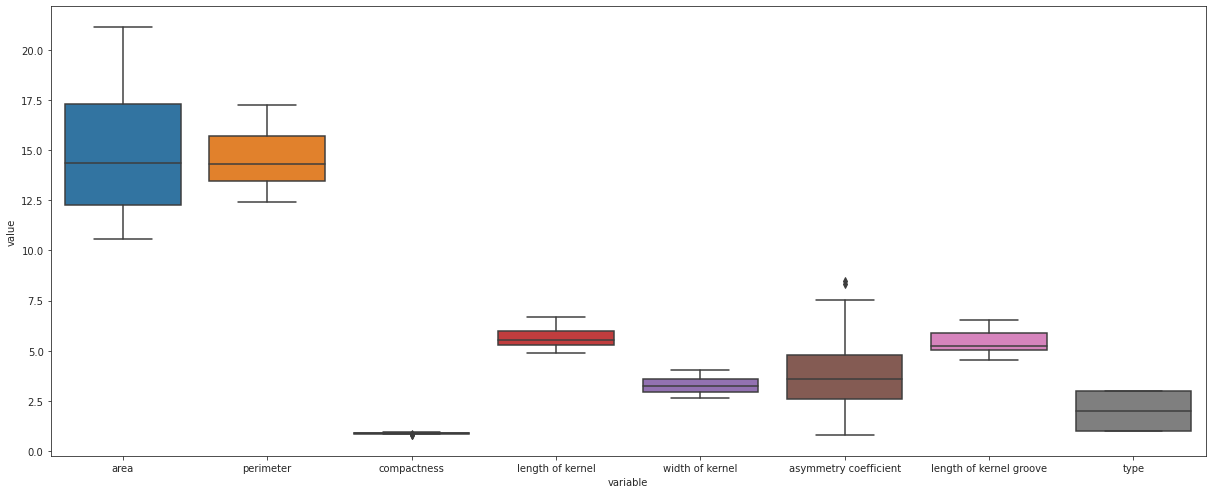

In [442]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 8.27)
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

All columns appear to have no outliers other than the 'asymmetry coefficient'.  Even at that, it is a valid flower dimension, so it should not be discounted.  

We will apply log transformation followed by `RobustScaler` to it. To all other predictor columns we will apply `StandardScaler`.  

In [443]:
df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### Remove one of the types and map remaining to 0,1
As the classification algorithm expects only binary values in the target class, we train with only one type, the rest are set to 0 (i.e. not that type)


In [444]:
#df.drop(df.loc[df['type']==3].index, inplace=True)
# Create a mapper

scale_mapper = {
    1 : 1,
    2 : 0,
    3 : 0
}
df['type'] = df['type'].replace(scale_mapper)

df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.333333
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.472531
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000


## Data Preparation
All columns are in numerical format.  The type column is key for the type of seed and the remaining data should be normalised.

Now split the outlier and other predictor columns.



```
# This is formatted as code
```

We will attempt training SVM and Random Forest classifiers. We will tune their parameters, compare them and choose the best classifier for our problem. Here we will prepare a scikit-learn pipeline for data preparation (preprocessing pipeline), which we will apply later. The use of his pipelines ensures that preprocessing is applied separately to any training validation and test dataset without data leakage.

First, we need to prepare two lists of column names. The list `names_outliers` contains the names of the three columns to which we will apply log transformation followed by `RobustScaler`. The list `names_no_outliers` contains the names of all other predictor columns to which we will apply `StandardScaler`.

In [0]:
# store a list with the names of all predictors
names_all = [c for c in df if c not in ['type']]

# define column groups with same data preparation
names_outliers = ['asymmetry coefficient']
names_no_outliers = list(set(names_all) - set(names_outliers))

After splitting a dataset into a training and test datasets, the names of the columns are lost. This is the reason, we stored the names of the columns in lists above. We will use the following class in the preprocessing pipeline to put the names of the columns back. We need this to easily apply the different preparation strategies to the two groups of columns. 

In [0]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

Then we need another class to be able to select a particular group of columns.

In [0]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

Finally, we can build the preprocessing pipeline. It first adds the column names back to a set of examples (that can be either a training, or a validation, or test set). Then it applies the two different data preparation strategies to the two groups of columns and unites them with `FeatureUnion`. 

In [0]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

In [449]:
df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.333333
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.472531
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000


In [450]:
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Now we can separate the columns into *target* and *predictors* and split the dataset into a training and test sets. 

In [0]:
y = df['type']
X = df.drop('type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

The parameter `stratify=y` ensures both classes are represented in the same proportion in both the training and the test sets.

Note that after the split into a training and test sets, X_train and X_test are numpy arrays and no longer have column names. That's why we needed the class above to put the names of columns back in the preprocessing pipeline.

## Training the classification models

### Grid Search for Best Parameters of Classifiers
This is required for SVM and Random Forest models.

It is not required for Gaussian Naive Bayes (GNB) nor K Nearest Neighbour (KNN).

Next, we train an SVM classifier with the training set and a range of possible parameters in order to find the best parameters for SVM by cross-validation. To do this we will build another pipeline which includes the preprocessing pipeline and the SVM classifier. The pipeline will take care for separately preprocessing the training and validation sets after the training set is further split into training and validation sets in the process of cross-validation.

In [452]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

# Detremine parameters and metrics accuracy, precision, recall and F1-score
y_pred = search.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Best CV score = 0.964:
Best parameters:  {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.92      0.79      0.85        14

    accuracy                           0.90        42
   macro avg       0.91      0.88      0.89        42
weighted avg       0.91      0.90      0.90        42



The parameter `refit=True` makes the GridSearchCV train an SVM classifier on the **whole training set** with the best parameters found. This best SVM model can then be accessed via the `.best_estimator_` attribute of the GridSearchCV.

Let's repeat the same experiment but with the Random Forest classifier.

In [453]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

# Now perform the prediction and check the results.
y_pred = search.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Best CV score = 0.929:
Best parameters:  {'rf__max_depth': 4, 'rf__n_estimators': 30}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.92      0.79      0.85        14

    accuracy                           0.90        42
   macro avg       0.91      0.88      0.89        42
weighted avg       0.91      0.90      0.90        42



## Task 3:  Addition of other Classification Models

Here we add the pipeline configuration for the GNB and the KNN models and obtain scores

### Gaussian Naive Bayes


In [454]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# There is no grid search needed for GNB




GaussianNB(priors=None, var_smoothing=1e-09)

Show metrics classifictaion report for GNB

In [455]:
# Now perform the prediction and check the results.
y_pred = GNB_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.75      0.64      0.69        14

    accuracy                           0.81        42
   macro avg       0.79      0.77      0.78        42
weighted avg       0.81      0.81      0.81        42



### K Nearest Neighbour

In [456]:
from sklearn.neighbors import KNeighborsClassifier
# Use the common config value of k=5
KNN_model= KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

# There is no grid search needed for KNN


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Show metrics classifictaion report for KNN

In [457]:
# Now perform the prediction and check the results.
y_pred = KNN_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.82      0.64      0.72        14

    accuracy                           0.83        42
   macro avg       0.83      0.79      0.80        42
weighted avg       0.83      0.83      0.83        42



## Compare all fours Classifiers on prediction v actual

Here we plot the following metrics for the four models run


- accuracy
- precisions
- recall
- F1-score
- TPR (true positive rate)
- AUC (area under the ROC curve)

To plot ROC curves for the models, we need to ensure that the same fpr (false positive rate) scale is used for all curves. For this reason, we take a scale of 100 equally spaced fpr values between 0 and 1.

In [0]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [0]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

Now we will use the function above to evaluate the best SVM and Random Forest models found by the grid search and the two new models, which needed no parameters.

In [460]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
GNB_accuracy, GNB_precision, GNB_recall, GNB_f1_score, GNB_tpr, GNB_auc = evaluate_model(X_test, y_test, GNB_model)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score, KNN_tpr, KNN_auc = evaluate_model(X_test, y_test, KNN_model)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


We will use a pandas bar plot to compare the accuracies of both models as well as their precision, recall and F1-score for class 1. 

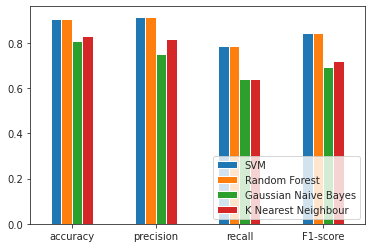

In [461]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
GNB_metrics = np.array([GNB_accuracy, GNB_precision, GNB_recall, GNB_f1_score])
KNN_metrics = np.array([KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score])

index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'Gaussian Naive Bayes': GNB_metrics, 'K Nearest Neighbour': KNN_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

All classifiers perform well with SVM being generally the best. 


We can also examine the ROC curves of the four classifiers for class 1.

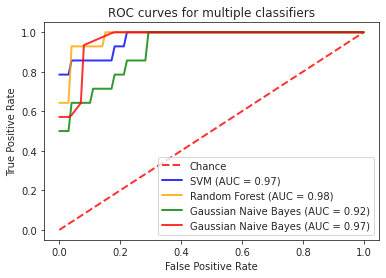

In [462]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, GNB_tpr[0,:], lw=2, color='green', label='Gaussian Naive Bayes (AUC = %0.2f)' % (GNB_auc), alpha=0.8)
plt.plot(mean_fpr, KNN_tpr[0,:], lw=2, color='red', label='Gaussian Naive Bayes (AUC = %0.2f)' % (KNN_auc), alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

The ROC curves confirm that all classifiers perform significantly better than a random guess (the red dashed line). 